In [110]:
interactive = False

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import random as rd
from pylab import *
import networkx as nx
import random as rd

def initialize():
    global g, timestep
    timestep = 0
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    title(f't = {str(timestep)}')
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)
    a = sum([g.nodes[i]['state'] for i in g.nodes]) # number of nodes that's the first color
    b = 33 - a # number of nodes that's the seconod color
    return(a, b, timesteps) # returns the number of nodes for each color

def update():
    global g, timestep
    timestep += 1
    #print(f"number of nodes is {g.nodes}")
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    #print(f"number of listener nodes is {listener}")
    #print(f"number of speaker nodes is {speaker}")

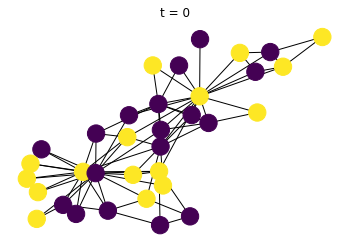

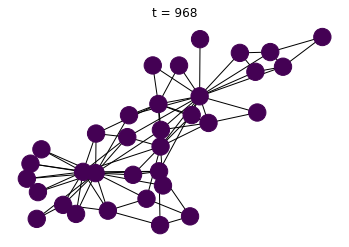

<Figure size 432x288 with 0 Axes>

In [111]:
initialize()
observe()
figure()
print('')

while 0 not in observe(): # This while loop breaks when homogeneity is achieved
    update()
observe()
figure()
print('')

I noticed that the code takes forever to run, and thus if we run Monte Carlo simulations to get the average number of timesteps for homogeneity to be achieved, it will take a very long time. 

Nonetheless, here's the code for it:

In [ ]:
# Monte Carlo Simulation

import matplotlib.pyplot as plt

num_timesteps = []
timesteps_list = []

for _ in range(100):
    initialize()
    while 0 not in observe(): # This while loop breaks when homogeneity is achieved
        update()
        num_timesteps.append(update())
    timesteps_list.append(len(num_timesteps)*2)

print(timesteps_list)

(19, 14)

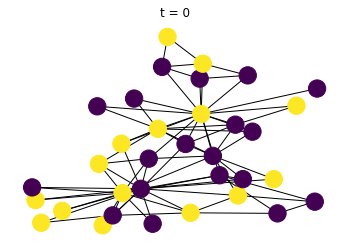

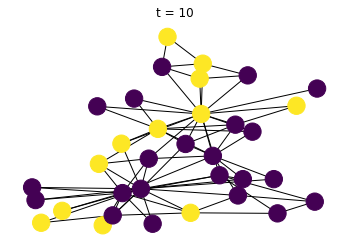

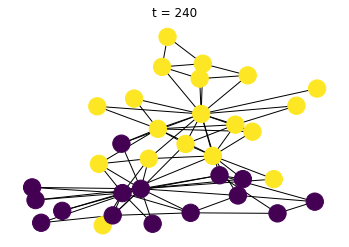

In [103]:
# Deterministic method 

# Run the simulator for 100 steps and show some of the steps.
initialize()
observe()
figure()
print('')

for i in range(10):
    update()
observe()
figure()
print('')

for i in range(230):
    update()
observe()